In [1]:
# ANN Model 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm
sns.set()

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [3]:
# reading loans dataset

loans = pd.read_csv('lending_club_loan.csv')

In [4]:
# function to fill in missing mort_acc values

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [5]:
# feature engineering

loans['loan_repaid'] = loans['loan_status'].map({'Fully Paid':1,'Charged Off':0})
total_acc_avg = loans.groupby('total_acc').mean()['mort_acc']
loans['mort_acc'] = loans.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

#categorical variables
loans['term'] = loans['term'].apply(lambda term: int(term[:3]))
loans['home_ownership']=loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
loans['zip_code'] = loans['address'].apply(lambda address:address[-5:])
loans['earliest_cr_year'] = loans['earliest_cr_line'].apply(lambda date:int(date[:4]))

dummies = pd.get_dummies(loans[['zip_code','home_ownership','grade','verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
loans = loans.drop(['zip_code','address', 'home_ownership', 'grade','verification_status', 'application_type','initial_list_status','purpose'],axis=1)
loans = pd.concat([loans,dummies],axis=1)

loans = loans.drop(['emp_title','emp_length','title','sub_grade', 'issue_d', 'earliest_cr_line', 'loan_status'],axis=1)
loans = loans.dropna()

In [6]:
# separating labels from the data for training

X = loans.drop('loan_repaid',axis=1).values
y = loans['loan_repaid'].values

In [7]:
# train-test-validation split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [8]:
# Normalizing the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
# Baseline Model

model1 = Sequential()
model1.add(Dense(units=100,activation='relu'))
model1.add(Dense(units=80,activation='relu'))
model1.add(Dense(units=40,activation='relu'))
model1.add(Dense(units=20,activation='relu'))
model1.add(Dense(units=10,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

In [10]:
# Training the model

model1.fit(x=X_train, y=y_train, epochs=100,
          batch_size=1000, validation_data=(X_val, y_val), )

Train on 34935 samples, validate on 7486 samples
Epoch 1/100
34935/34935 [==============================] - 2s 68us/sample - loss: 0.4897 - val_loss: 0.3965
Epoch 2/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.3604 - val_loss: 0.3043
Epoch 3/100
34935/34935 [==============================] - 1s 16us/sample - loss: 0.2899 - val_loss: 0.2644
Epoch 4/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.2708 - val_loss: 0.2586
Epoch 5/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.2692 - val_loss: 0.2702
Epoch 6/100
34935/34935 [==============================] - 1s 16us/sample - loss: 0.2682 - val_loss: 0.2578
Epoch 7/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.2639 - val_loss: 0.2585
Epoch 8/100
34935/34935 [==============================] - 1s 16us/sample - loss: 0.2628 - val_loss: 0.2545
Epoch 9/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.259

Epoch 76/100
34935/34935 [==============================] - 0s 10us/sample - loss: 0.2045 - val_loss: 0.3249
Epoch 77/100
34935/34935 [==============================] - 0s 14us/sample - loss: 0.2044 - val_loss: 0.3253
Epoch 78/100
34935/34935 [==============================] - 0s 13us/sample - loss: 0.2072 - val_loss: 0.3264
Epoch 79/100
34935/34935 [==============================] - 0s 11us/sample - loss: 0.2053 - val_loss: 0.3230
Epoch 80/100
34935/34935 [==============================] - 0s 14us/sample - loss: 0.2034 - val_loss: 0.3258
Epoch 81/100
34935/34935 [==============================] - 0s 13us/sample - loss: 0.2028 - val_loss: 0.3252
Epoch 82/100
34935/34935 [==============================] - 0s 14us/sample - loss: 0.2010 - val_loss: 0.3337
Epoch 83/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.2033 - val_loss: 0.3326
Epoch 84/100
34935/34935 [==============================] - 1s 15us/sample - loss: 0.2013 - val_loss: 0.3477
Epoch 85/100
34935/

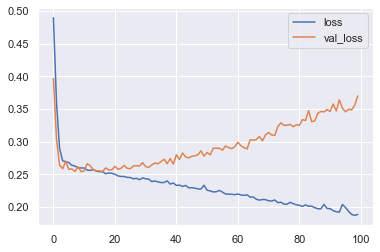

In [11]:
# plotting training and validation loss

losses = pd.DataFrame(model1.history.history)
losses[['loss','val_loss']].plot()

In [12]:
# classification accuracy on validation data

predictions = model1.predict_classes(X_val)
print(classification_report(y_val, predictions))
print('\n Accuracy: ', (accuracy_score(y_val,predictions)))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62      1444
           1       0.90      0.93      0.92      6042

    accuracy                           0.86      7486
   macro avg       0.78      0.75      0.77      7486
weighted avg       0.86      0.86      0.86      7486


 Accuracy:  0.8628105797488645


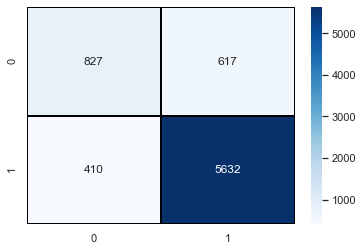

In [13]:
# confusion matrix of validation data

sns.heatmap(confusion_matrix(y_val, predictions), annot = True, fmt = 'd', cmap = 'Blues', linewidths=1, linecolor='black')

In [14]:
# F1 score and Area under Precision recall Curve for validation data

ann_probs = model1.predict_proba(X_val)
ann_precision, ann_recall, _ = precision_recall_curve(y_val, ann_probs)
ann_f1, ann_auc = f1_score(y_val, predictions), auc(ann_recall, ann_precision)
print('ANN: F1 Score = %.3f PR-AUC = %.3f' % (ann_f1, ann_auc))


ANN: F1 Score = 0.916 PR-AUC = 0.967


In [17]:
# adding early stopping criterion to avoid overfitting as overfiiting was occuring in the first model

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [18]:
# Final Model with early stopping and regularization

model2 = Sequential()
model2.add(Dense(units=100,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(units=50,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(units=5,activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model2.add(Dense(units=1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
# training the model

model2.fit(x=X_train, y=y_train, epochs=100,
          batch_size = 1000, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stop])

Train on 34935 samples, validate on 7486 samples
Epoch 1/100
34935/34935 [==============================] - 2s 55us/sample - loss: 0.6398 - val_loss: 0.5624
Epoch 2/100
34935/34935 [==============================] - 0s 6us/sample - loss: 0.5194 - val_loss: 0.4591
Epoch 3/100
34935/34935 [==============================] - 0s 10us/sample - loss: 0.4415 - val_loss: 0.4098
Epoch 4/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.4100 - val_loss: 0.3892
Epoch 5/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.3941 - val_loss: 0.3781
Epoch 6/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.3827 - val_loss: 0.3672
Epoch 7/100
34935/34935 [==============================] - 0s 13us/sample - loss: 0.3754 - val_loss: 0.3615
Epoch 8/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.3688 - val_loss: 0.3556
Epoch 9/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.3649

34935/34935 [==============================] - 0s 7us/sample - loss: 0.2902 - val_loss: 0.2830
Epoch 77/100
34935/34935 [==============================] - 0s 11us/sample - loss: 0.2901 - val_loss: 0.2837
Epoch 78/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.2899 - val_loss: 0.2828
Epoch 79/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.2915 - val_loss: 0.2825
Epoch 80/100
34935/34935 [==============================] - 0s 11us/sample - loss: 0.2895 - val_loss: 0.2838
Epoch 81/100
34935/34935 [==============================] - 0s 12us/sample - loss: 0.2887 - val_loss: 0.2816
Epoch 82/100
34935/34935 [==============================] - 0s 7us/sample - loss: 0.2887 - val_loss: 0.2816
Epoch 83/100
34935/34935 [==============================] - 0s 11us/sample - loss: 0.2881 - val_loss: 0.2811
Epoch 84/100
34935/34935 [==============================] - 0s 11us/sample - loss: 0.2877 - val_loss: 0.2817
Epoch 85/100
34935/34935 [========

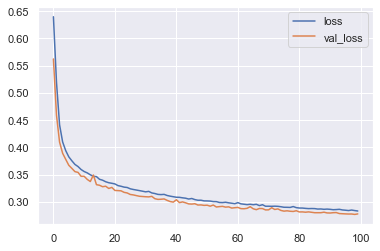

In [20]:
# plotting model losses

model_loss = pd.DataFrame(model2.history.history)
model_loss.plot()

In [25]:
# classification accuracies of final model on validation data

predictions = model2.predict_classes(X_val)
print(classification_report(y_val, predictions))
print('\n Accuracy: ', (accuracy_score(y_val,predictions)))

              precision    recall  f1-score   support

           0       0.93      0.48      0.63      1444
           1       0.89      0.99      0.94      6042

    accuracy                           0.89      7486
   macro avg       0.91      0.74      0.79      7486
weighted avg       0.90      0.89      0.88      7486


 Accuracy:  0.8930002671653754


In [26]:
# Classfication accuracies of final model on test data

predictions = model2.predict_classes(X_test)
print(classification_report(y_test, predictions))
print('\n Accuracy of Final Model: ', (accuracy_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62      1395
           1       0.89      0.99      0.94      6092

    accuracy                           0.89      7487
   macro avg       0.91      0.73      0.78      7487
weighted avg       0.90      0.89      0.88      7487


 Accuracy of Final Model:  0.8924802991852544


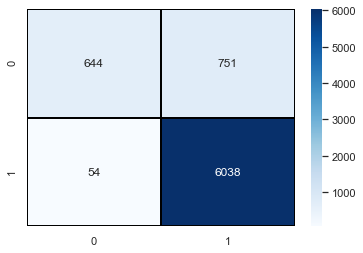

In [27]:
# confusion matrix of test data

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = 'd', cmap = 'Blues', linewidths=1, linecolor='black')

In [28]:
# F1 score and Area under Precision-Recall Curve for test data

ann_probs = model2.predict_proba(X_test)
ann_precision, ann_recall, _ = precision_recall_curve(y_test, ann_probs)
ann_f1, ann_auc = f1_score(y_test, predictions), auc(ann_recall, ann_precision)
print('ANN: F1 Score = %.3f PR-AUC = %.3f' % (ann_f1, ann_auc))

ANN: F1 Score = 0.938 PR-AUC = 0.976
